## Setup

**Import Modules**

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset

In [100]:

df = pd.read_csv('medical_examination.csv')

In [6]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### 1. Add overweight column to data

In [109]:
df['bmi'] = df['weight'] / (df['height']/ 100)**2 
df['overweight'] = [1 if bmi > 25 else 0 for bmi in df['bmi']]
df['overweight']
df = df.drop(['bmi'], axis=1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


### 2. Normalize the 'cholesterol' and 'gluc' data. 0 if good, 1 if bad.


In [ ]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

### 3. Create the Catplot like examplary one

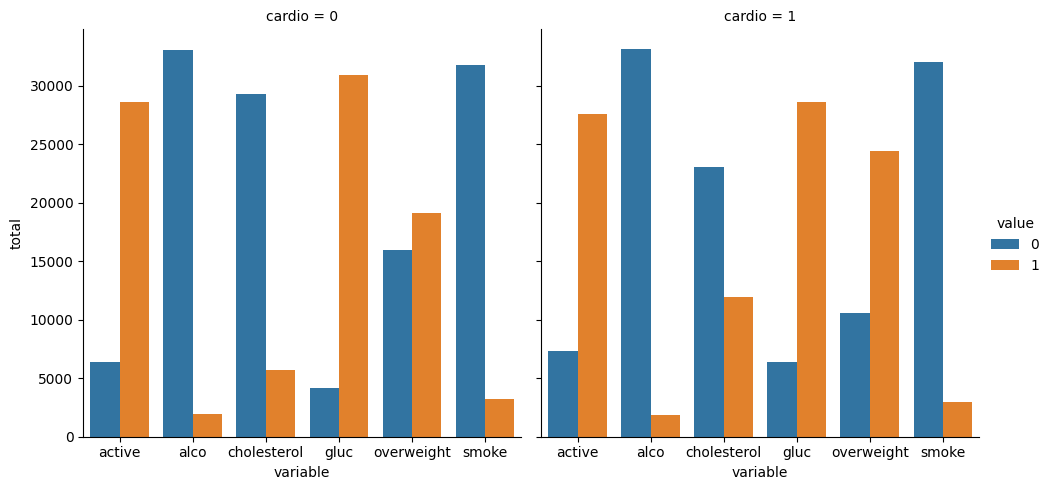

In [77]:
features = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
df_long = pd.melt(df, id_vars=['cardio'], value_vars=features)

df_long
# Create the count plot
g = sns.catplot(
    data=df_long,
    kind='count',
    x='variable',
    col='cardio',
    hue='value',
)

# # Customize the plot
g.set_ylabels("total")
plt.show()

### 4. Draw the HeatMap like examplary one

**Clean the Data**

In [115]:
# Define masks for weight and height
weight_mask = (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))
height_mask = (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))

# Apply masks to create df_heat
df_heat = df[weight_mask & height_mask]

**Create correlation matrix and mask (upper triangle out)**

[Very helpful Kaggle Notebook](https://www.kaggle.com/discussions/general/223072)

In [116]:
# creation of correlation matrix
corrM = df_heat.corr()
# Create a mask
mask = np.triu(np.ones_like(corrM, dtype=bool))

**Create and plot the figure**

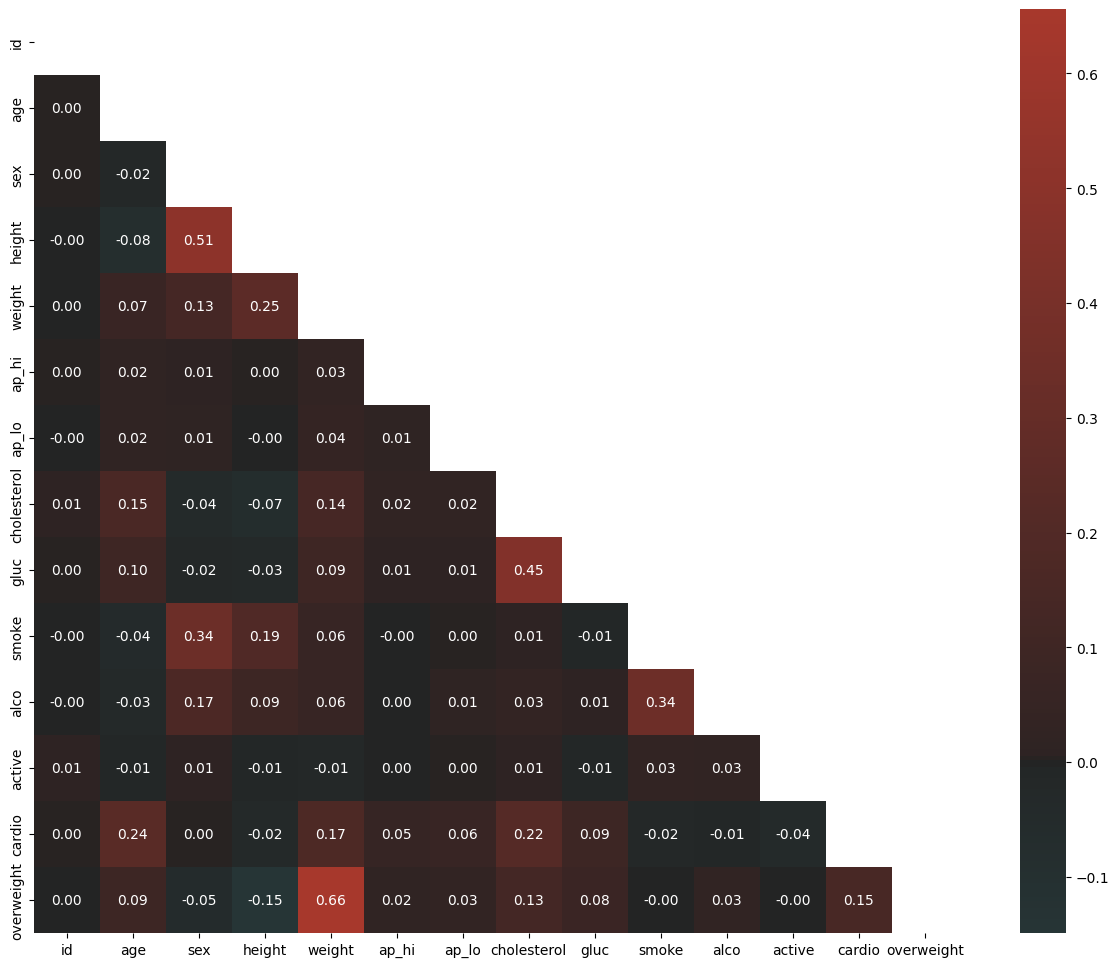

In [117]:
# Create a custom divergin palette
cmap = sns.diverging_palette(200, 15, l=40, n=9, center="dark", as_cmap=True)

plt.figure(figsize=(16, 12))
fig = sns.heatmap(corrM, mask=mask, center=0, annot=True,
            fmt='.1f', square=True, cmap=cmap)
plt.show()